In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

## 学習データ

In [56]:
data=pd.read_csv("../../kaggle/ASHRAE/train.csv/train.csv")
weather_info=pd.read_csv("../../kaggle/ASHRAE/weather_train.csv/weather_train.csv")
building_metadata=pd.read_csv("../../kaggle/ASHRAE/building_metadata.csv")

In [3]:
data=data.merge(building_metadata,how="left",on="building_id")
data=data.merge(weather_info,how="left",on=["timestamp","site_id"])

### データの種類

### 天気のデータは16か所

|変数名|説明|データの種類|
|:-|:----------------------------------------|:-----:|
|**meter_reading**|**使用電力料**,予測したい値|連続データ|
|building_id|データファイルを結合するための番号||
|meter|電力メータの種類を表す|0,1,2,3|
|timestamp|データを取得した時間を表す|1時間ピッチの時刻|
|site_id|データファイルを統合するために必要な番号||
|primary_use|建物の使用目的|文字列のデータ(Education,office)|
|square_feet|面積|数値の連続データ|
|year_built|建物を建てた年|西暦|
|floor_count|建物の部屋数|整数データ|
|air_temperature|気温(℃)|数値の連続データ|
|cloud_coverage|雲の量|0から9の10段階で分類|
|dew_temperature|露点温度(℃)|数値の連続データ|
|precip_depth_1_hr|降水量(mm)|数値の連続データ|
|sea_level_pressure|気圧(hPa)|数値の連続データ|
|wind_direction|風向(°)|0～360|
|wind_speed|風速(m/s)|数値の連続データ|






In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   building_id         int64  
 1   meter               int64  
 2   timestamp           object 
 3   meter_reading       float64
 4   site_id             int64  
 5   primary_use         object 
 6   square_feet         int64  
 7   year_built          float64
 8   floor_count         float64
 9   air_temperature     float64
 10  cloud_coverage      float64
 11  dew_temperature     float64
 12  precip_depth_1_hr   float64
 13  sea_level_pressure  float64
 14  wind_direction      float64
 15  wind_speed          float64
dtypes: float64(10), int64(4), object(2)
memory usage: 2.6+ GB


### 欠損値の確認
- #### データの行数は20216100
- #### 結構データの欠損あり

In [22]:
data

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.000,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.000,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.000,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.000,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.000,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750,15,Entertainment/public assembly,19619,1914.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216096,1445,0,2016-12-31 23:00:00,4.825,15,Education,4298,NaN,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216097,1446,0,2016-12-31 23:00:00,0.000,15,Entertainment/public assembly,11265,1997.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216098,1447,0,2016-12-31 23:00:00,159.575,15,Lodging/residential,29775,2001.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8


In [6]:
data.isnull().sum()

building_id                  0
meter                        0
timestamp                    0
meter_reading                0
site_id                      0
primary_use                  0
square_feet                  0
year_built            12127645
floor_count           16709167
air_temperature          96658
cloud_coverage         8825365
dew_temperature         100140
precip_depth_1_hr      3749023
sea_level_pressure     1231669
wind_direction         1449048
wind_speed              143676
dtype: int64

### テストデータ

In [7]:
test_data=pd.read_csv("../../kaggle/ASHRAE/test.csv/test.csv")
weather_info_test=pd.read_csv("../../kaggle/ASHRAE/weather_test.csv/weather_test.csv")


In [8]:
test_data=test_data.merge(building_metadata,how="left",on="building_id")

In [9]:
test_data=test_data.merge(weather_info_test,how="left",on=["timestamp","site_id"])

In [15]:
data["timestamp"]=pd.to_datetime(data["timestamp"])
test_data["timestamp"]=pd.to_datetime(test_data["timestamp"])

In [23]:
weather_info["timestamp"]=pd.to_datetime(weather_info["timestamp"])
weather_info_test["timestamp"]=pd.to_datetime(weather_info_test["timestamp"])

In [10]:
data

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.000,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.000,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.000,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.000,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.000,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750,15,Entertainment/public assembly,19619,1914.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216096,1445,0,2016-12-31 23:00:00,4.825,15,Education,4298,NaN,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216097,1446,0,2016-12-31 23:00:00,0.000,15,Entertainment/public assembly,11265,1997.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216098,1447,0,2016-12-31 23:00:00,159.575,15,Lodging/residential,29775,2001.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8


### データの分布を確認
- ### とりあえず全部ログで表示
- ### 全体の傾向を見るためなのでビンは適当
- #### メータは三種類

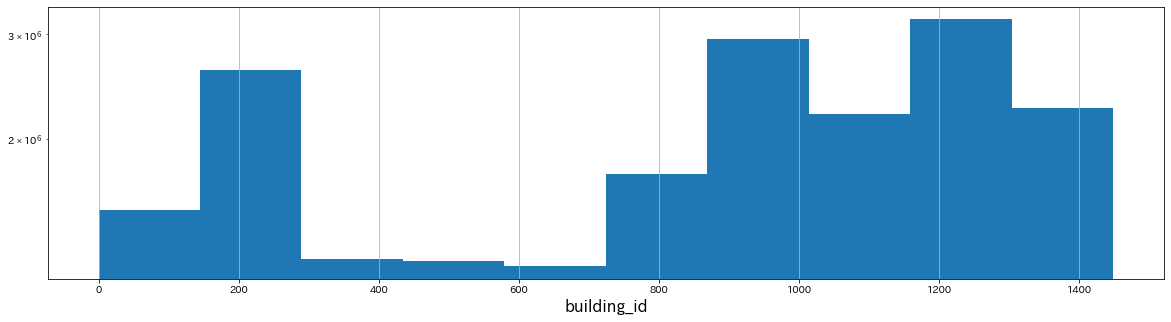

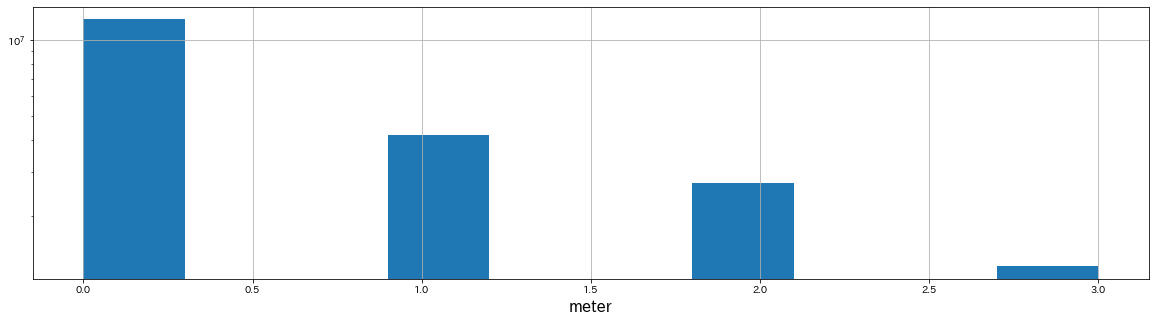

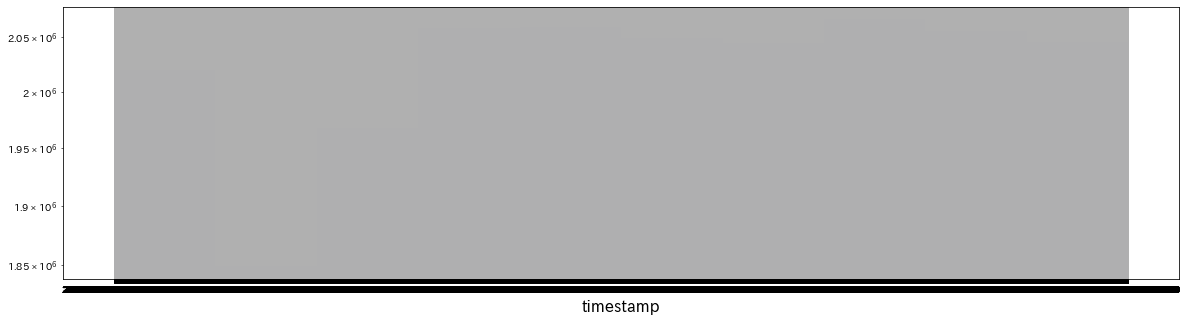

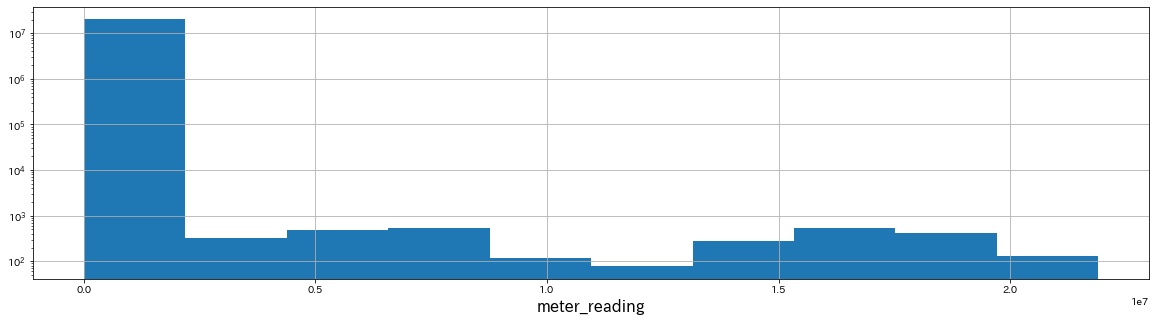

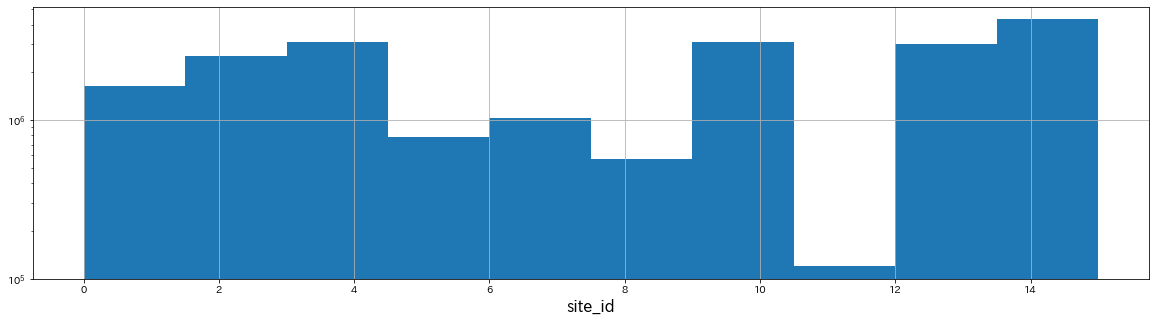

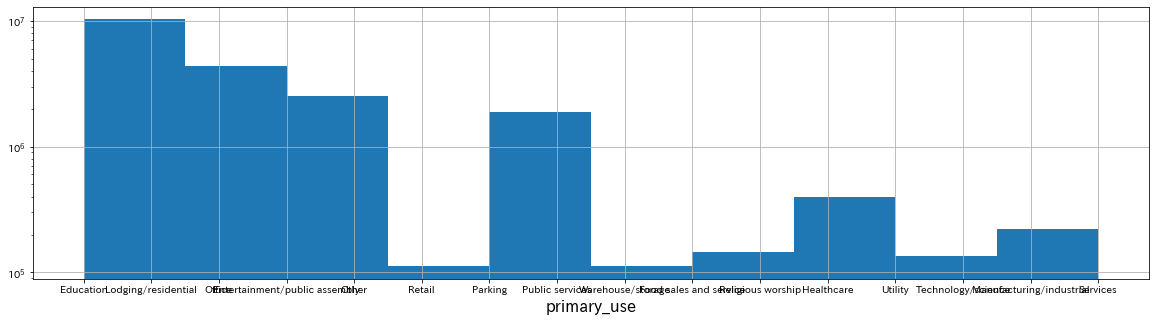

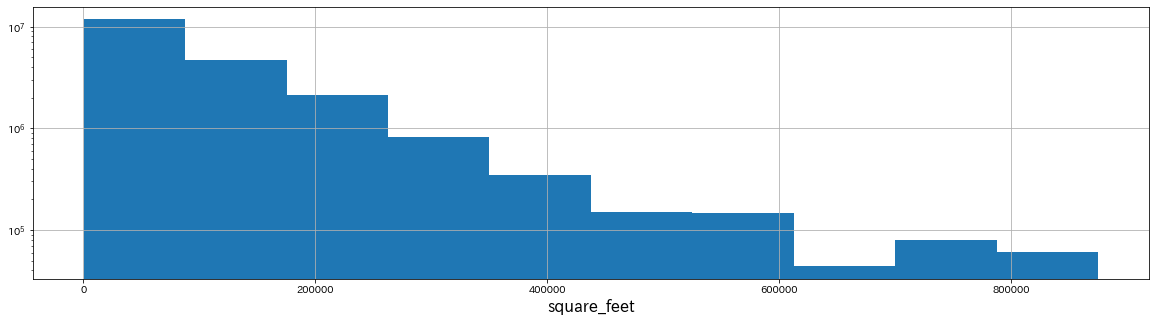

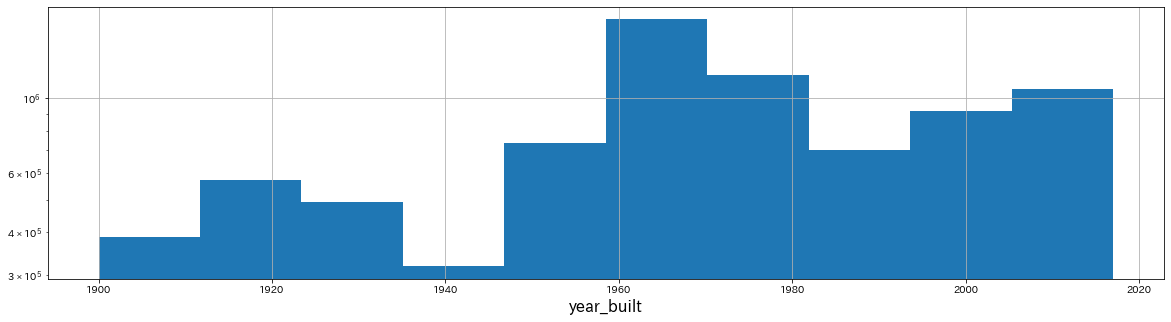

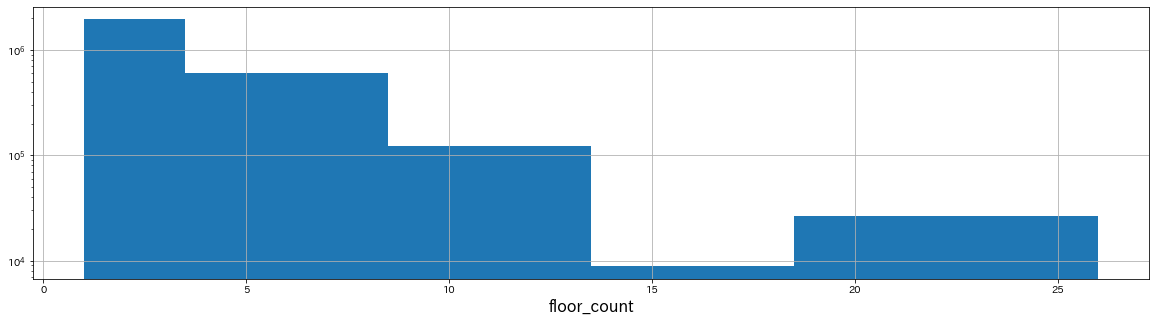

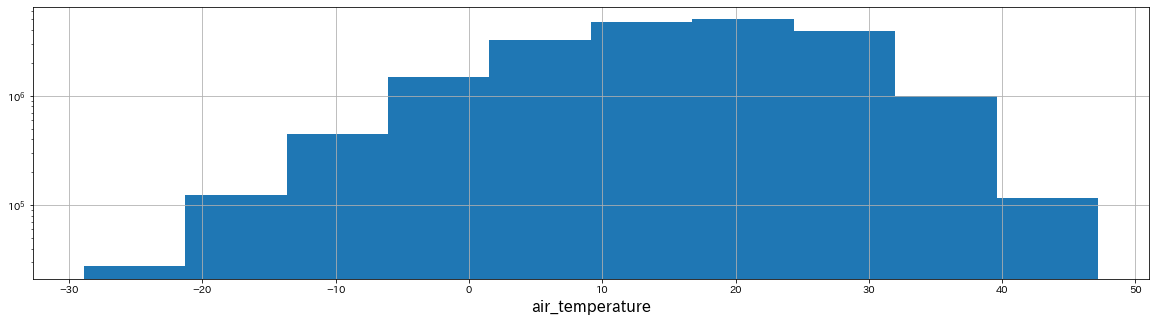

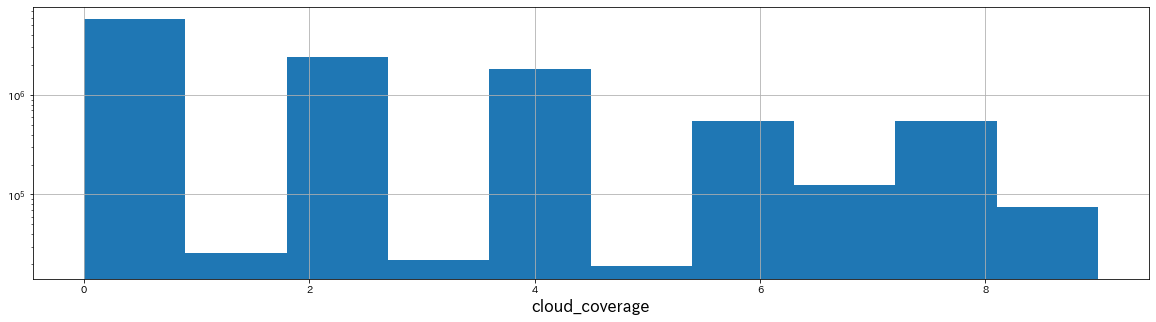

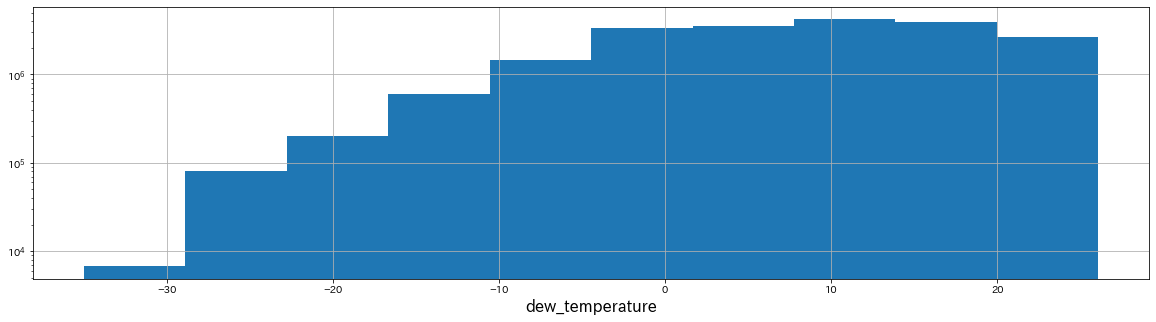

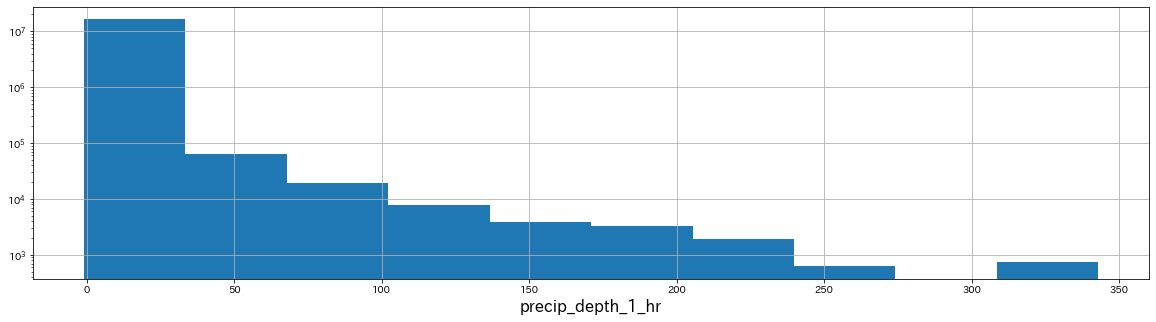

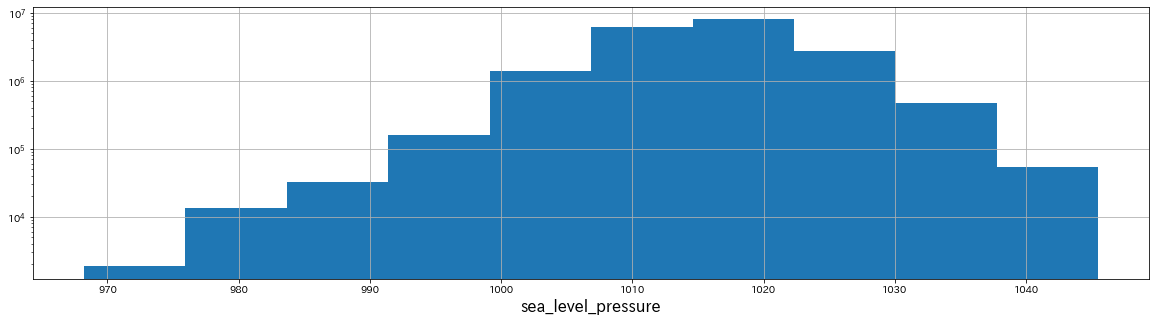

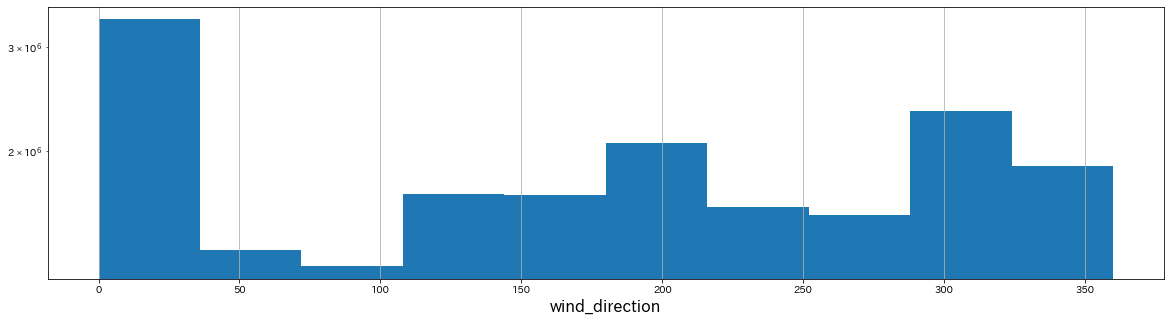

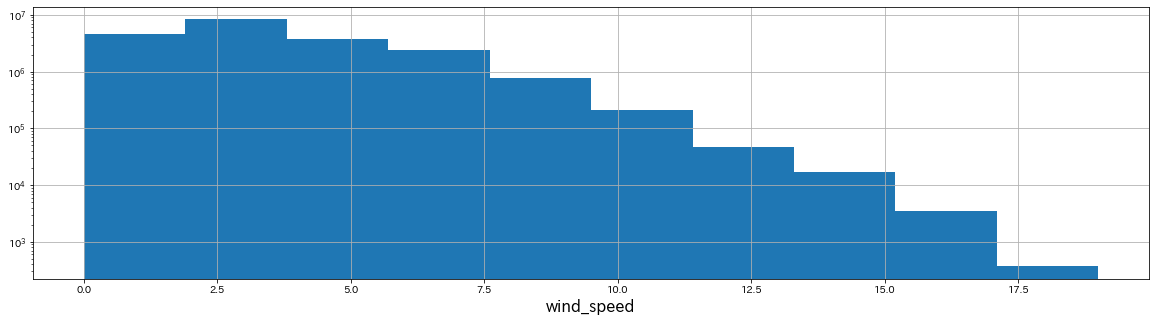

In [17]:
for i in data.columns:
    fig,ax=plt.subplots(1,1,figsize=(20,5))
    ax.hist(data[i])
    ax.set_xlabel(i,fontsize=16)
#ax.hist(data["meter_reading"])
    ax.set_yscale("log")
    ax.grid()

In [31]:
test_data.columns

Index(['row_id', 'building_id', 'meter', 'timestamp', 'site_id', 'primary_use',
       'square_feet', 'year_built', 'floor_count', 'air_temperature',
       'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr',
       'sea_level_pressure', 'wind_direction', 'wind_speed'],
      dtype='object')

## 学習データと検証データの分布

In [63]:
### ヒストグラムを作る関数
def making_hist(x,y,label,n):
    ax[x][y].hist(data[label],histtype="step",label="学習データ")
    ax[x][y].hist(test_data[label],histtype="step",label="検証データ")
    ax[x][y].set_xlabel(label,fontsize=16)
    ax[x][y].legend(fontsize=16)
    ax[x][y].grid()
    if(n==1):
        ax[x][y].set_yscale("log")
    

### 天気系の情報

c:\users\komori\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\komori\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
c:\users\komori\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\komori\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
c:\users\komori\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\komori\appdata\local\programs\python\

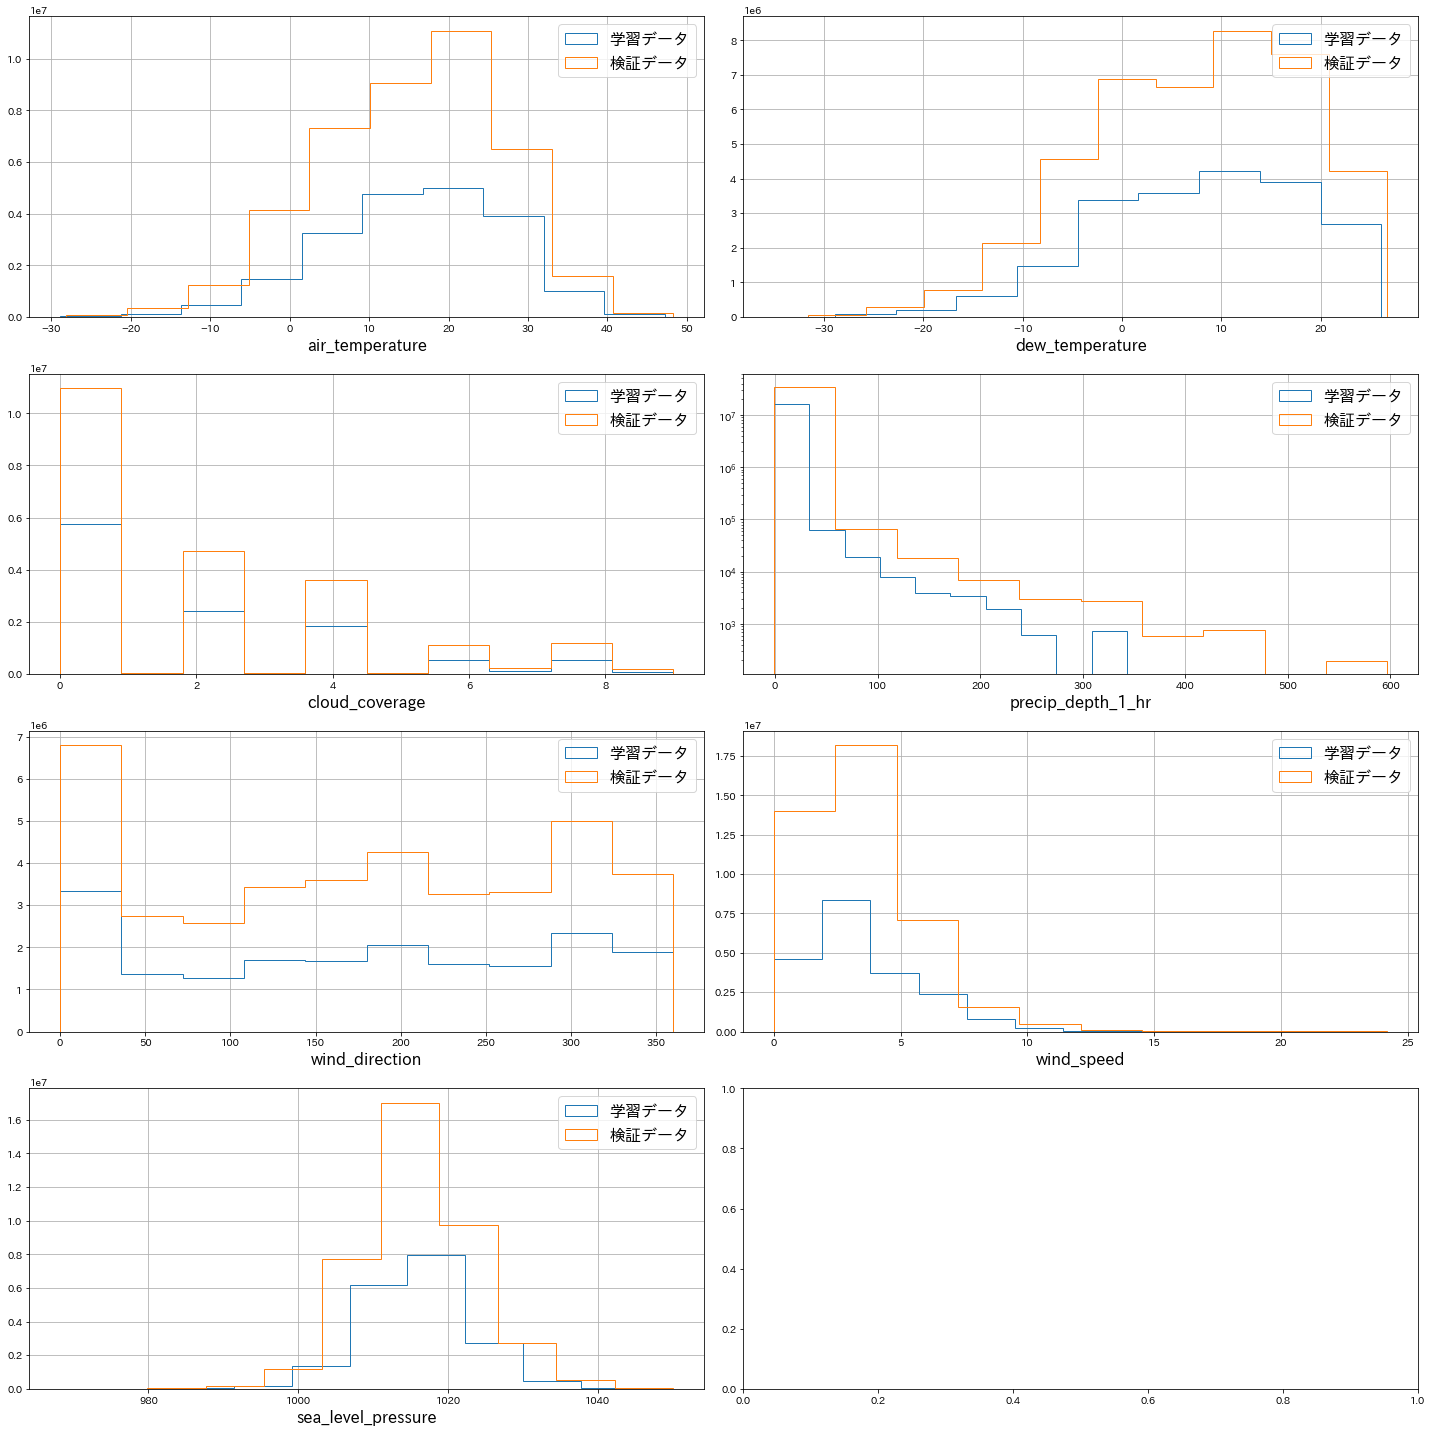

In [112]:
fig,ax=plt.subplots(4,2,figsize=(20,20))
#ax[0][0].hist(data["air_temperature"],histtype="step",label="学習データ")
#ax[0][0].hist(test_data["air_temperature"],histtype="step",label="検証データ")


#ax[0][0].set_xlabel("air_temperature",fontsize=16)
#ax.grid()
making_hist(0,0,"air_temperature",0)
making_hist(0,1,"dew_temperature",0)
making_hist(1,0,"cloud_coverage",0)
making_hist(1,1,"precip_depth_1_hr",1)
making_hist(2,0,"wind_direction",0)
making_hist(2,1,"wind_speed",0)
making_hist(3,0,"sea_level_pressure",0)
plt.tight_layout()

### 建物系の情報

c:\users\komori\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\komori\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
c:\users\komori\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\komori\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
c:\users\komori\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\komori\appdata\local\programs\python\

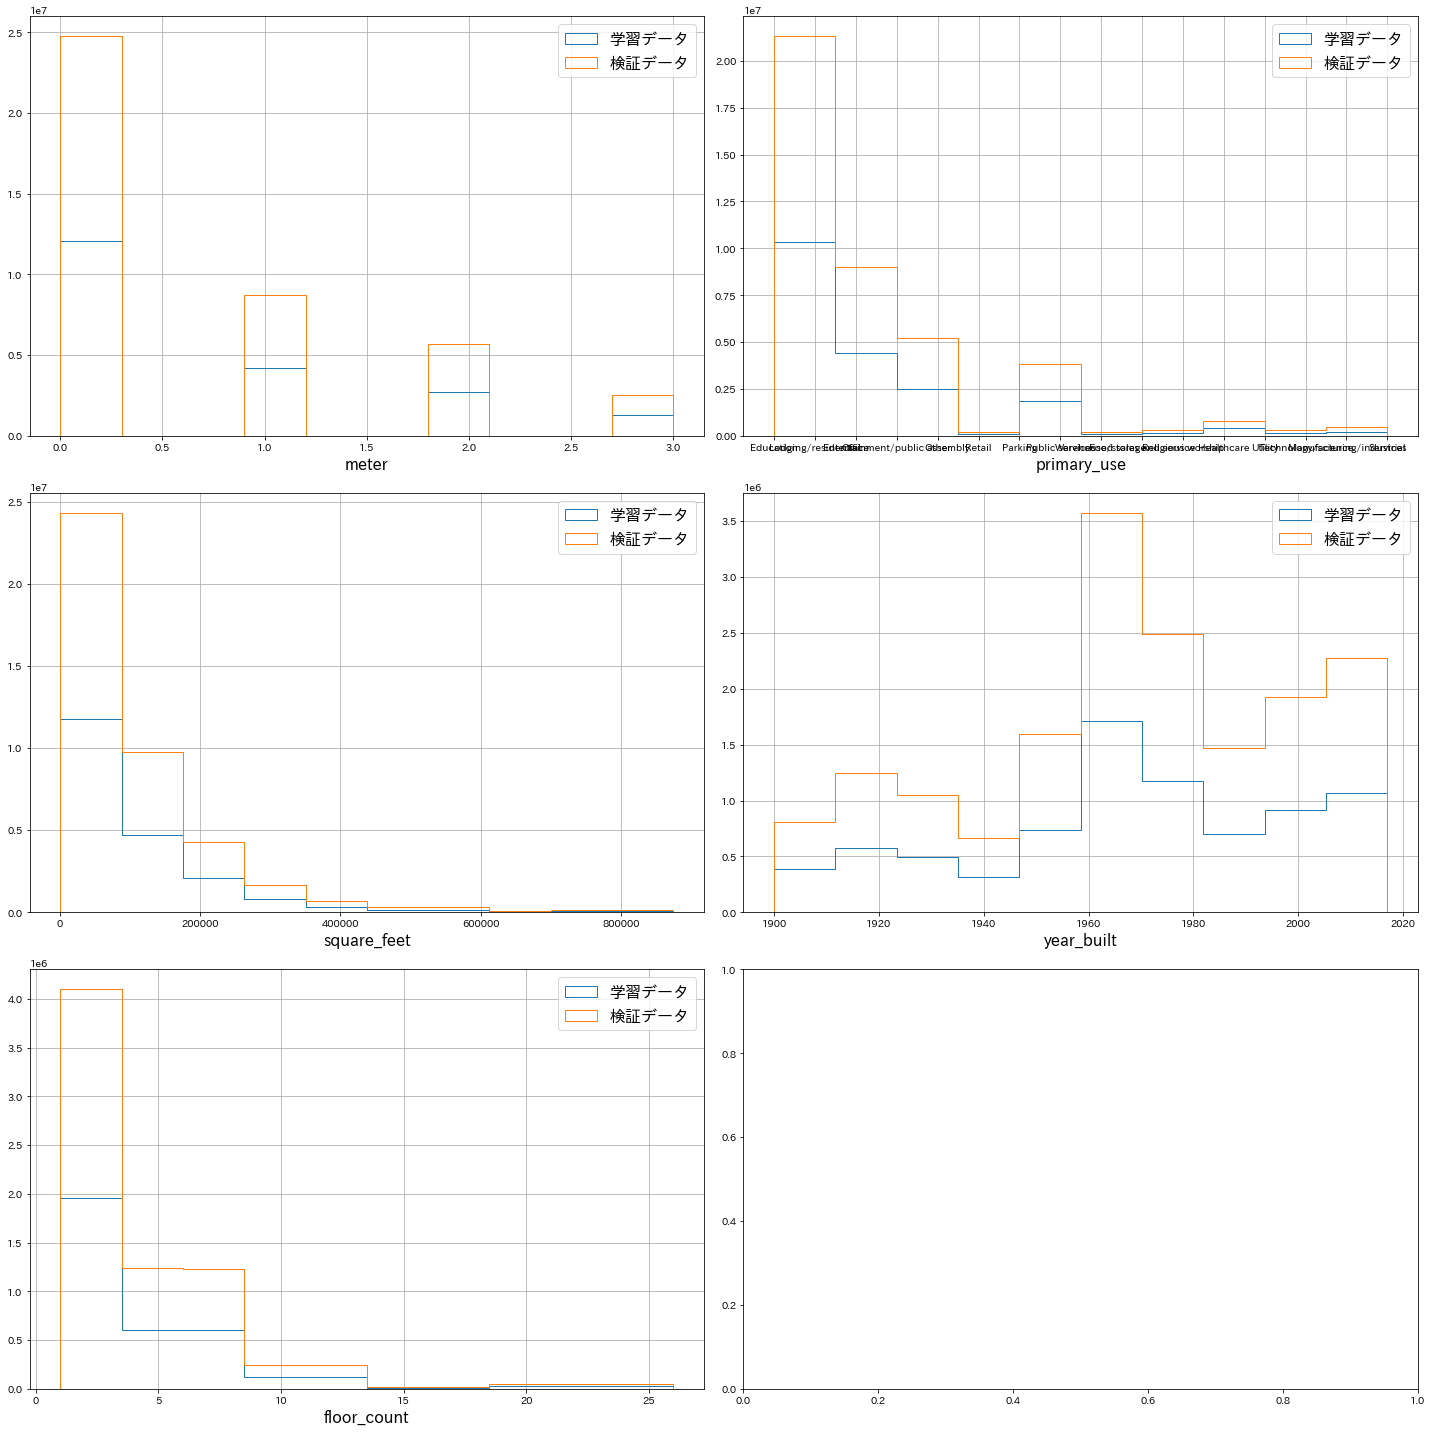

In [113]:
fig,ax=plt.subplots(3,2,figsize=(20,20))
#ax[0][0].hist(data["air_temperature"],histtype="step",label="学習データ")
#ax[0][0].hist(test_data["air_temperature"],histtype="step",label="検証データ")


#ax[0][0].set_xlabel("air_temperature",fontsize=16)
#ax.grid()
making_hist(0,0,"meter",0)
making_hist(0,1,"primary_use",0)
making_hist(1,0,"square_feet",0)
making_hist(1,1,"year_built",0)
making_hist(2,0,"floor_count",0)
plt.tight_layout()

### 使用目的がわかりにくかったので再度表示

([<matplotlib.axis.YTick at 0x188c52a9788>,
 [Text(0, 0, 'Education'),
  Text(0, 1, 'Office'),
  Text(0, 2, 'Entertainment/public assembly'),
  Text(0, 3, 'Lodging/residential'),
  Text(0, 4, 'Public services'),
  Text(0, 5, 'Healthcare'),
  Text(0, 6, 'Other'),
  Text(0, 7, 'Parking'),
  Text(0, 8, 'Manufacturing/industrial'),
  Text(0, 9, 'Food sales and service'),
  Text(0, 10, 'Retail'),
  Text(0, 11, 'Warehouse/storage'),
  Text(0, 12, 'Services'),
  Text(0, 13, 'Technology/science'),
  Text(0, 14, 'Utility'),
  Text(0, 15, 'Religious worship')])

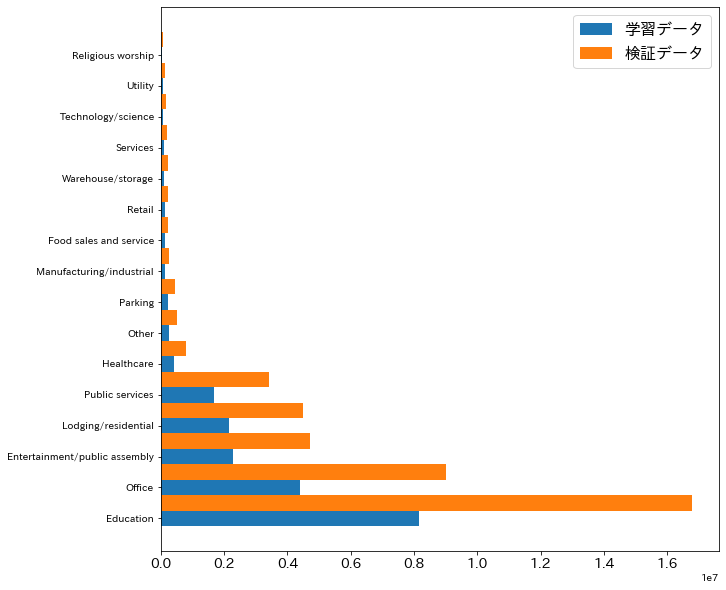

In [105]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.tick_params(axis="x",labelsize=14)
left=np.arange(len(data["primary_use"].value_counts().keys()))
ax.barh(left,data["primary_use"].value_counts(),height=0.5,label="学習データ")
ax.barh(left+0.5,test_data["primary_use"].value_counts(),height=0.5,label="検証データ")
ax.legend(fontsize=16)
plt.yticks(np.arange(len(data["primary_use"].value_counts().keys())),data["primary_use"].value_counts().keys())

In [95]:
data["primary_use"].value_counts().keys()

Education                        8165504
Office                           4394864
Entertainment/public assembly    2264917
Lodging/residential              2146413
Public services                  1662826
Healthcare                        398527
Other                             242222
Parking                           213796
Manufacturing/industrial          125713
Food sales and service            114090
Retail                            112657
Warehouse/storage                 111861
Services                           96519
Technology/science                 77627
Utility                            56203
Religious worship                  32361
Name: primary_use, dtype: int64

In [31]:
data.groupby("primary_use").count()

,building_id,meter,timestamp,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
primary_use,,,,,,,,,,,,,,,
Education,8165504,8165504,8165504,8165504,8165504,8165504,4051418,1911191,8122109,4482979,8119813,6183102,7554590,7467235,8098867
Entertainment/public assembly,2264917,2264917,2264917,2264917,2264917,2264917,841529,468655,2254094,1315036,2253799,1879276,2054174,2076892,2248102
Food sales and service,114090,114090,114090,114090,114090,114090,26343,0,114028,73831,114028,113501,112922,108913,113876
Healthcare,398527,398527,398527,398527,398527,398527,77500,8784,397928,235291,397913,382248,383709,385758,397313
Lodging/residential,2146413,2146413,2146413,2146413,2146413,2146413,1068349,152602,2130263,1236024,2129982,1730758,2071584,1947797,2123476
Manufacturing/industrial,125713,125713,125713,125713,125713,125713,55441,26352,124444,58113,124432,75300,95337,121033,124345
Office,4394864,4394864,4394864,4394864,4394864,4394864,1076179,356542,4378270,2488867,4378004,3772515,4208236,4156441,4370646
Other,242222,242222,242222,242222,242222,242222,56438,124358,241984,139872,241961,233064,230443,234291,241629
Parking,213796,213796,213796,213796,213796,213796,117206,20589,213736,119681,213729,210343,211431,207442,213748


### 次は2次元の散布図を表示

In [109]:
### ヒストグラムを作る関数
def scatter_plot(x,y,label,n):
    ax[x][y].scatter(data[label],data["meter_reading"],label="学習データ")
    ax[x][y].set_xlabel(label,fontsize=16)
    ax[x][y].set_ylabel("meter_reading",fontsize=16)
    ax[x][y].legend(fontsize=16)
    ax[x][y].grid()
    if(n==1):
        ax[x][y].set_xscale("log")
    

c:\users\komori\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  
c:\users\komori\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


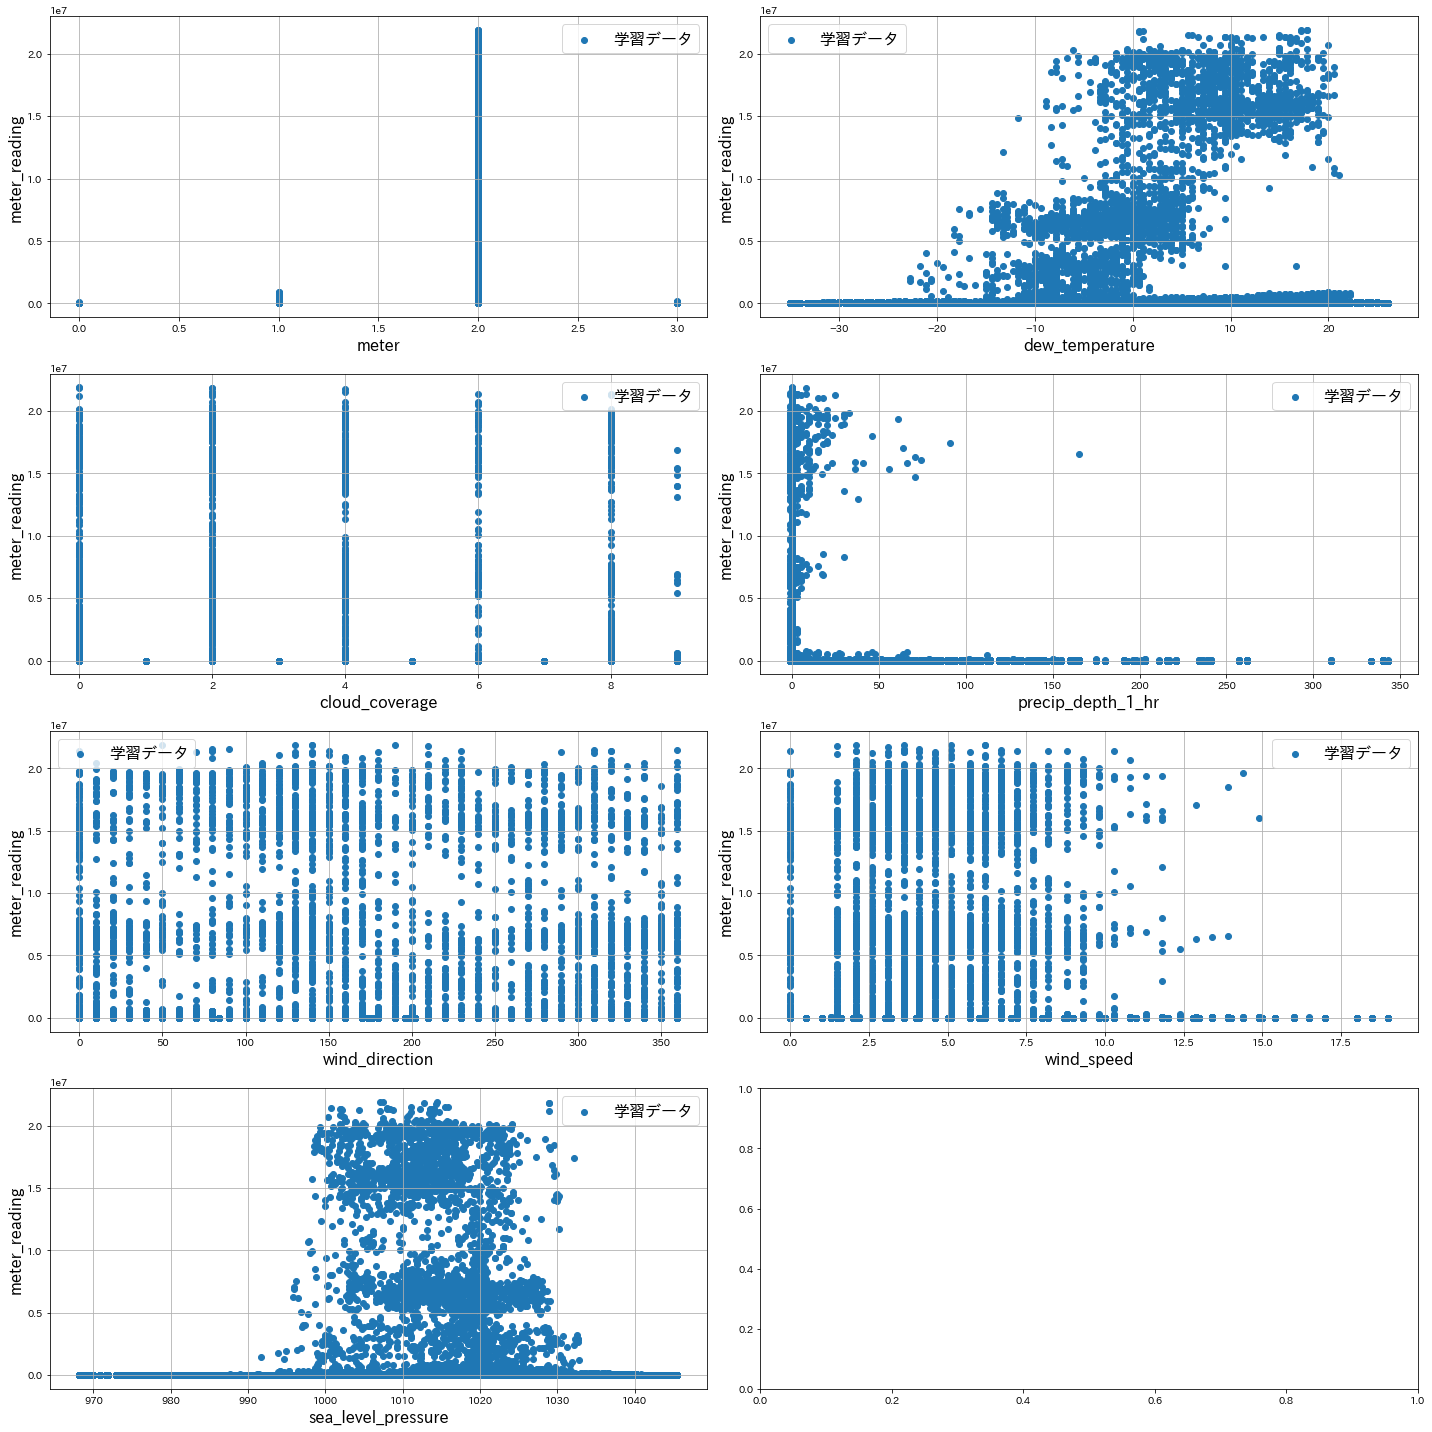

In [111]:
fig,ax=plt.subplots(4,2,figsize=(20,20))



#ax[0][0].set_xlabel("air_temperature",fontsize=16)
#ax.grid()
scatter_plot(0,0,"air_temperature",0)
scatter_plot(0,1,"dew_temperature",0)
scatter_plot(1,0,"cloud_coverage",0)
scatter_plot(1,1,"precip_depth_1_hr",0)
scatter_plot(2,0,"wind_direction",0)
scatter_plot(2,1,"wind_speed",0)
scatter_plot(3,0,"sea_level_pressure",0)
plt.tight_layout()

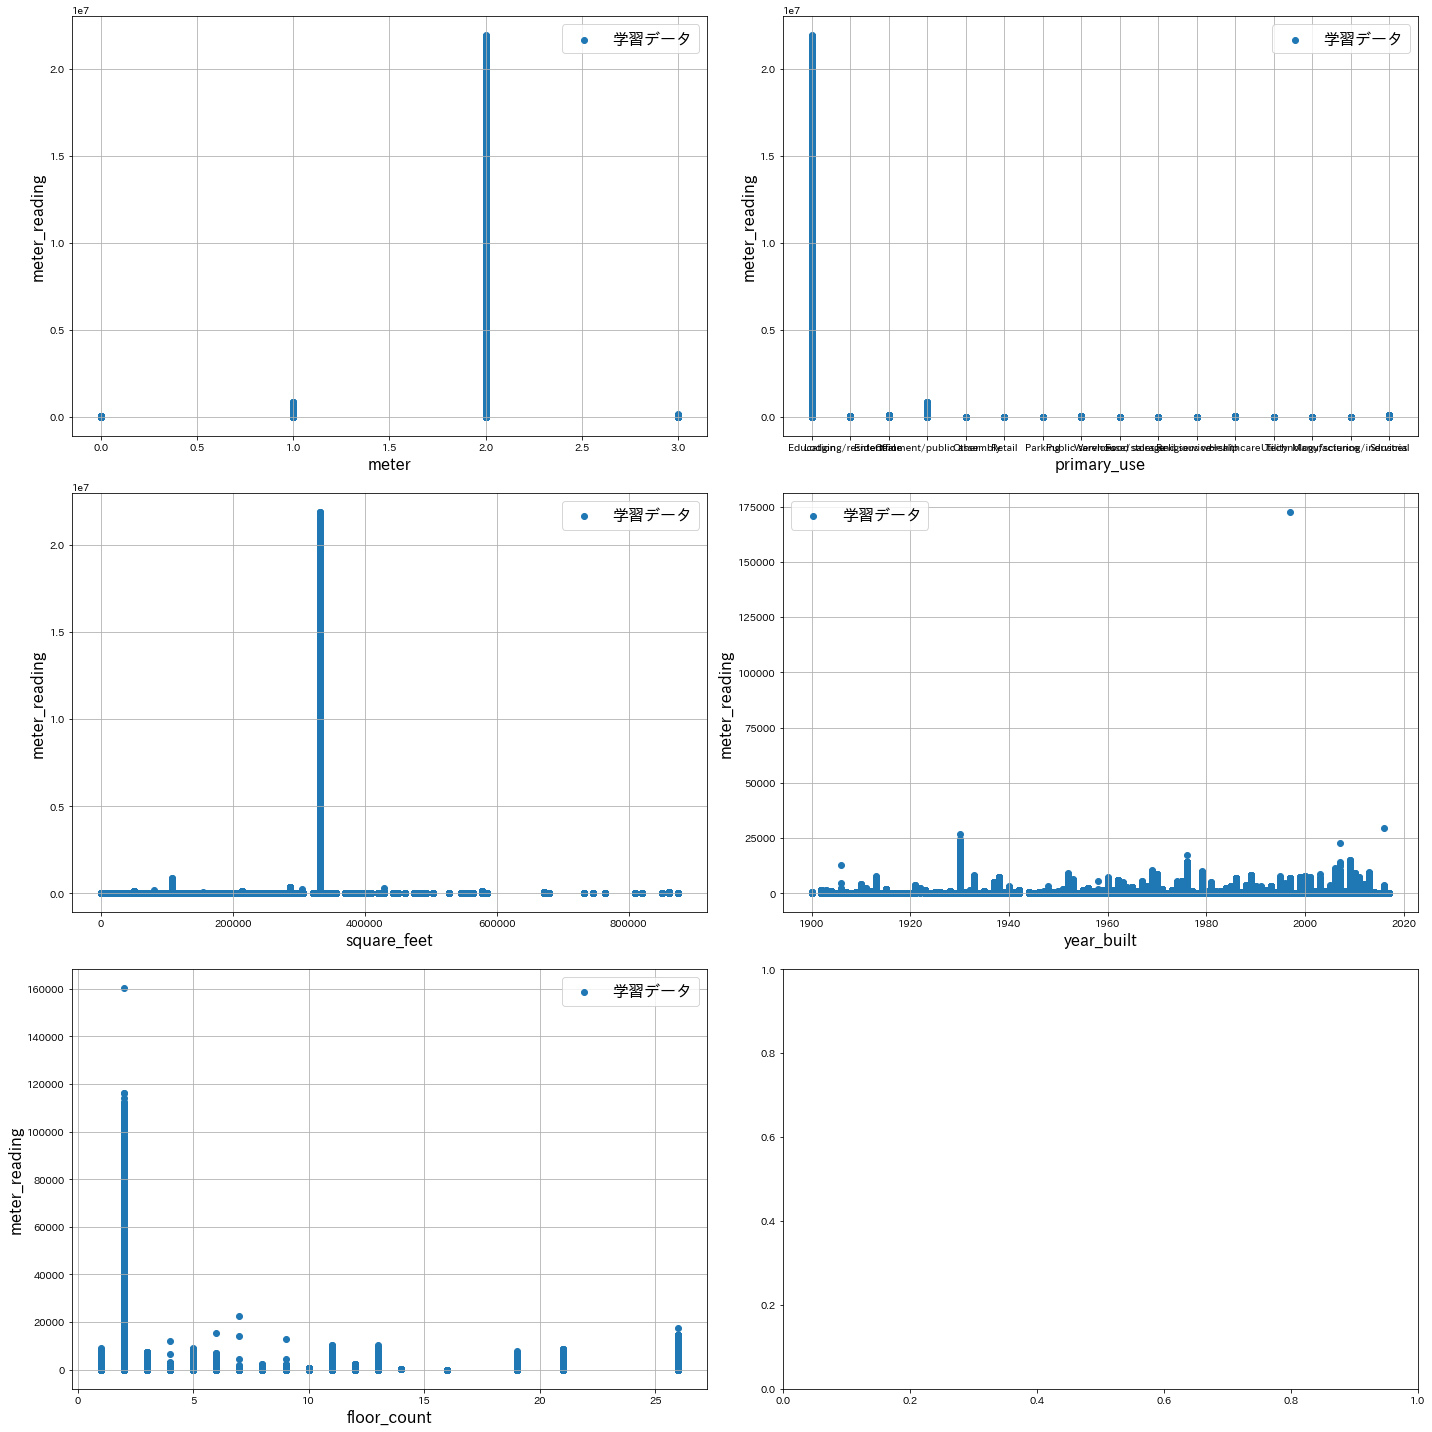

In [116]:
fig,ax=plt.subplots(3,2,figsize=(20,20))
#ax[0][0].hist(data["air_temperature"],histtype="step",label="学習データ")
#ax[0][0].hist(test_data["air_temperature"],histtype="step",label="検証データ")


#ax[0][0].set_xlabel("air_temperature",fontsize=16)
#ax.grid()
scatter_plot(0,0,"meter",0)
scatter_plot(0,1,"primary_use",0)
scatter_plot(1,0,"square_feet",0)
scatter_plot(1,1,"year_built",0)
scatter_plot(2,0,"floor_count",0)
plt.tight_layout()

In [33]:
data["primary_use"].value_counts()

Education                        8165504
Office                           4394864
Entertainment/public assembly    2264917
Lodging/residential              2146413
Public services                  1662826
Healthcare                        398527
Other                             242222
Parking                           213796
Manufacturing/industrial          125713
Food sales and service            114090
Retail                            112657
Warehouse/storage                 111861
Services                           96519
Technology/science                 77627
Utility                            56203
Religious worship                  32361
Name: primary_use, dtype: int64

In [35]:
data.groupby("primary_use").mean()["meter_reading"]

primary_use
Education                        4585.091840
Entertainment/public assembly     473.880691
Food sales and service            304.908018
Healthcare                        738.597583
Lodging/residential               279.710439
Manufacturing/industrial          285.897005
Office                            526.504420
Other                             138.703786
Parking                           169.386801
Public services                   288.237846
Religious worship                   5.375846
Retail                            139.782388
Services                         4113.468284
Technology/science                138.204258
Utility                           512.736861
Warehouse/storage                  54.362314
Name: meter_reading, dtype: float64

### データの保存

In [18]:
#test_data.to_csv("検証データ.csv",index=False)

In [19]:
#data.to_csv("学習データ",index=False)

### 16箇所の天気

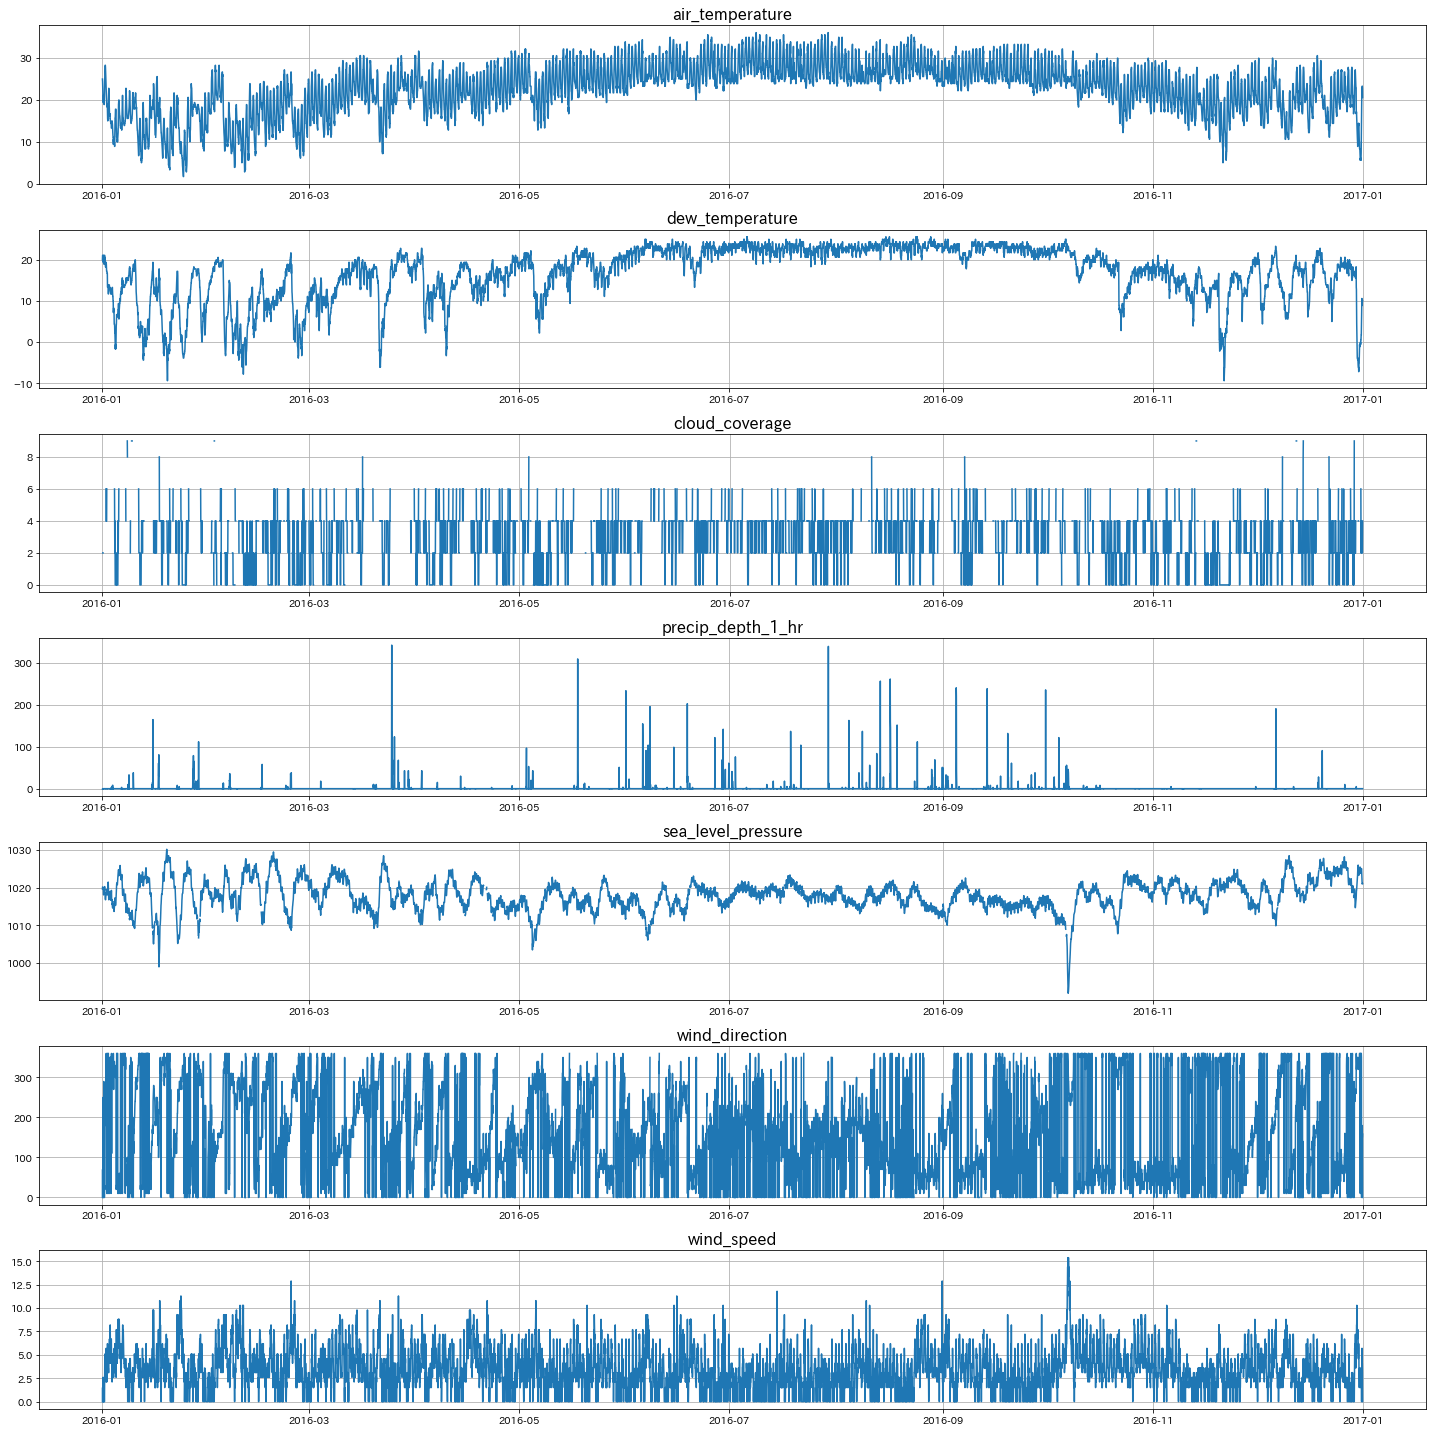

In [48]:
fig,ax=plt.subplots(7,1,figsize=(20,20))
id=0
ax[0].plot(weather_info[weather_info["site_id"]==id]["timestamp"],weather_info[weather_info["site_id"]==id]["air_temperature"])
ax[1].plot(weather_info[weather_info["site_id"]==id]["timestamp"],weather_info[weather_info["site_id"]==id]["dew_temperature"])
ax[2].plot(weather_info[weather_info["site_id"]==id]["timestamp"],weather_info[weather_info["site_id"]==id]["cloud_coverage"])
ax[3].plot(weather_info[weather_info["site_id"]==id]["timestamp"],weather_info[weather_info["site_id"]==id]["precip_depth_1_hr"])
ax[4].plot(weather_info[weather_info["site_id"]==id]["timestamp"],weather_info[weather_info["site_id"]==id]["sea_level_pressure"])
ax[5].plot(weather_info[weather_info["site_id"]==id]["timestamp"],weather_info[weather_info["site_id"]==id]["wind_direction"])
ax[6].plot(weather_info[weather_info["site_id"]==id]["timestamp"],weather_info[weather_info["site_id"]==id]["wind_speed"])

ax[0].set_title("air_temperature",fontsize=16)
ax[1].set_title("dew_temperature",fontsize=16)
ax[2].set_title("cloud_coverage",fontsize=16)
ax[3].set_title("precip_depth_1_hr",fontsize=16)
ax[4].set_title("sea_level_pressure",fontsize=16)
ax[5].set_title("wind_direction",fontsize=16)
ax[6].set_title("wind_speed",fontsize=16)
for i in range(7):
    ax[i].grid()
plt.tight_layout()

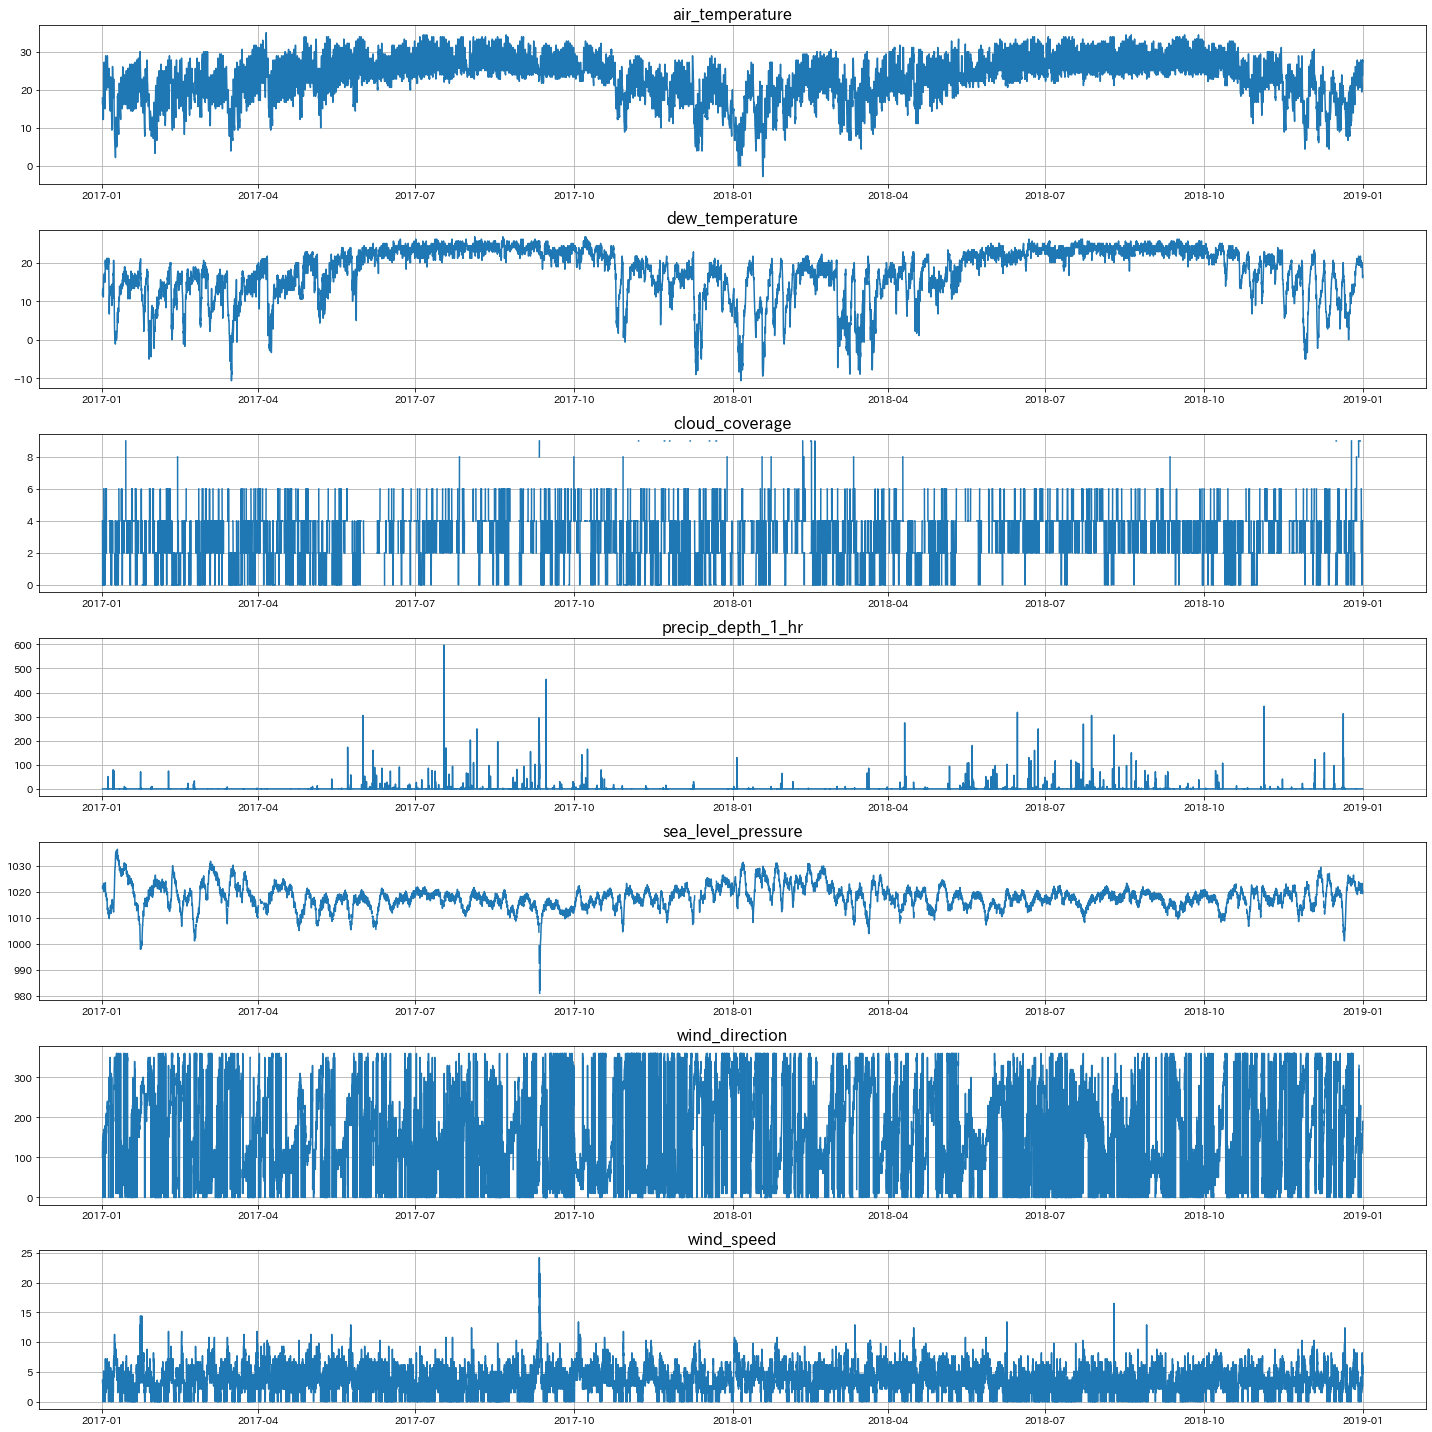

In [50]:
fig,ax=plt.subplots(7,1,figsize=(20,20))
id=0
ax[0].plot(weather_info_test[weather_info_test["site_id"]==id]["timestamp"],weather_info_test[weather_info_test["site_id"]==id]["air_temperature"])
ax[1].plot(weather_info_test[weather_info_test["site_id"]==id]["timestamp"],weather_info_test[weather_info_test["site_id"]==id]["dew_temperature"])
ax[2].plot(weather_info_test[weather_info_test["site_id"]==id]["timestamp"],weather_info_test[weather_info_test["site_id"]==id]["cloud_coverage"])
ax[3].plot(weather_info_test[weather_info_test["site_id"]==id]["timestamp"],weather_info_test[weather_info_test["site_id"]==id]["precip_depth_1_hr"])
ax[4].plot(weather_info_test[weather_info_test["site_id"]==id]["timestamp"],weather_info_test[weather_info_test["site_id"]==id]["sea_level_pressure"])
ax[5].plot(weather_info_test[weather_info_test["site_id"]==id]["timestamp"],weather_info_test[weather_info_test["site_id"]==id]["wind_direction"])
ax[6].plot(weather_info_test[weather_info_test["site_id"]==id]["timestamp"],weather_info_test[weather_info_test["site_id"]==id]["wind_speed"])

ax[0].set_title("air_temperature",fontsize=16)
ax[1].set_title("dew_temperature",fontsize=16)
ax[2].set_title("cloud_coverage",fontsize=16)
ax[3].set_title("precip_depth_1_hr",fontsize=16)
ax[4].set_title("sea_level_pressure",fontsize=16)
ax[5].set_title("wind_direction",fontsize=16)
ax[6].set_title("wind_speed",fontsize=16)
for i in range(7):
    ax[i].grid()
plt.tight_layout()

In [51]:
building_metadata

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


No handles with labels found to put in legend.


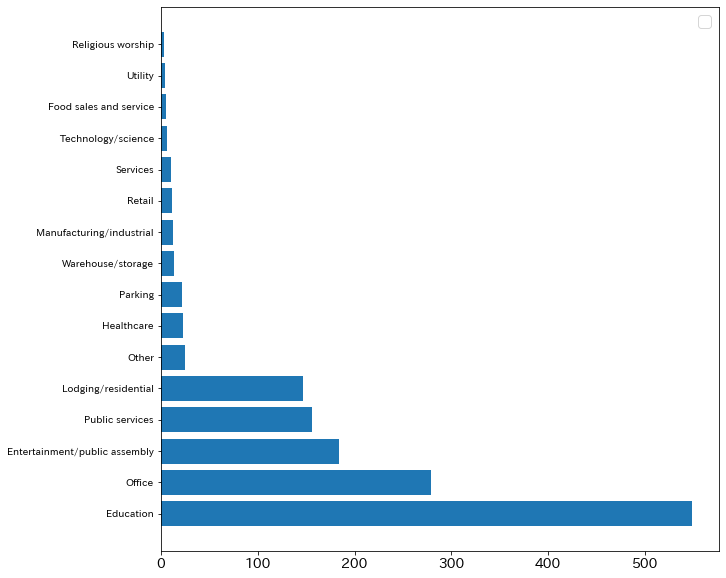

In [53]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.tick_params(axis="x",labelsize=14)
ax.barh(building_metadata["primary_use"].value_counts().keys(),building_metadata["primary_use"].value_counts())

ax.legend(fontsize=16)


In [55]:
building_metadata.isna().sum()

site_id           0
building_id       0
primary_use       0
square_feet       0
year_built      774
floor_count    1094
dtype: int64

In [58]:
weather_info[weather_info["site_id"]==0]

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...
8779,0,2016-12-31 19:00:00,22.8,NaN,10.0,0.0,1021.7,140.0,5.7
8780,0,2016-12-31 20:00:00,23.3,NaN,8.9,0.0,1021.0,170.0,4.1
8781,0,2016-12-31 21:00:00,23.3,NaN,10.0,0.0,1021.1,150.0,4.1
8782,0,2016-12-31 22:00:00,22.8,NaN,10.0,0.0,1021.1,160.0,3.1
